1. **Problem Statement**

> Objective:

The objective of this analysis is to predict employee attrition based on various features including job role, satisfaction level, and other demographic factors. By understanding the key drivers of attrition, we aim to develop strategies to improve employee retention.

> `Business Context:`

why solving this problem is important from a business perspective?

Employee attrition poses a significant challenge for businesses, leading to increased recruitment costs, loss of knowledge, and decreased morale among remaining staff. By predicting attrition and understanding its drivers, the organization can proactively address issues, reduce turnover, and enhance overall workforce stability.

> `Specific Goals:`

- Identify key features that contribute to employee attrition.
- Develop a predictive model to forecast attrition risk.
- Quantify the impact of different factors on attrition rates.


2. **Hypothesis Generation**


> `Initial Hypotheses:`

- Employees with lower job satisfaction are more likely to leave.
- Employees who frequently work overtime are more likely to leave.
- Employees with lower monthly incomes are more likely to leave.
- Employees living farther from the workplace are more likely to leave.
- Employees who have not been promoted for a long time are more likely to leave.
- Employees with poor work-life balance are more likely to leave.
- Employees in specific job roles have higher attrition rates.

(Certain job roles, particularly those with higher stress levels or fewer opportunities for advancement, may see higher attrition rates as employees leave for positions that offer better growth prospects and job satisfaction.)

> Potential Factors:

- Demographic Factors:

Age: Younger employees might leave for better opportunities; older employees may seek stability.

Gender: Attrition trends might differ between males and females due to workplace dynamics.

- Job-Related Factors:

Job Role: Higher attrition might occur in stressful or less rewarding roles.

Department: Variations in attrition across departments due to differing work environments.

- Work Environment Factors:

OverTime: Frequent overtime can lead to burnout and higher attrition.

Distance from Home: Longer commutes can increase stress and attrition rates.



#1- First Task : Data Preprocessing and Cleaning

#**Data Exploration**

#Importing Libraries

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [101]:
#Loading the dataset
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [102]:
#Descovering the head of the dataset
print('The head of data')
print(df.head())

#Descovering the tail of the dataset
print('The tail of data')
print(df.tail())

#Descovering the shape of the dataset
print('The shape of data')
print(df.shape)

#Descovering the columns of the dataset
print('The columns of data')
print(df.columns)

#Descovering the info of the dataset
print('The info of data')
print(df.info())

df.describe(include=['object'])

#Descovering the describe of the dataset
#Get a Statistical Summary
print('The description of data')
var_describe =df.describe()
print(var_describe)

#Descovering the null values of the dataset
print('The null values of data')
print(df.isnull().sum())

#Descovering the duplicated values of the dataset
print('The duplicated values of data')
print(df.duplicated().sum())


#Descovering the unique values of the dataset
#We have noticed that the columns StandardHours, Over18, and EmployeeCount all have only one unique value. Therefore, these columns do not provide useful information and can be removed from the dataset as they do not contribute to any meaningful analysis
print('The unique values of data')
print(df.nunique())


#The standard deviation of the columns EmployeeCount and StandardHours is 0, so we can delete these columns because all the rows have the same value.
print('The info  of data')
print(df.info())



The head of data
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

- The standard deviation of the columns EmployeeCount and StandardHours is 0, so we can delete these columns because all the rows have the same value.
- We have noticed that the columns StandardHours, Over18, and EmployeeCount all have only one unique value. Therefore, these columns do not provide useful information and can be removed from the dataset as they do not contribute to any meaningful analysis.
- There is no duplicated values and no missing values.

Correlation matrix:


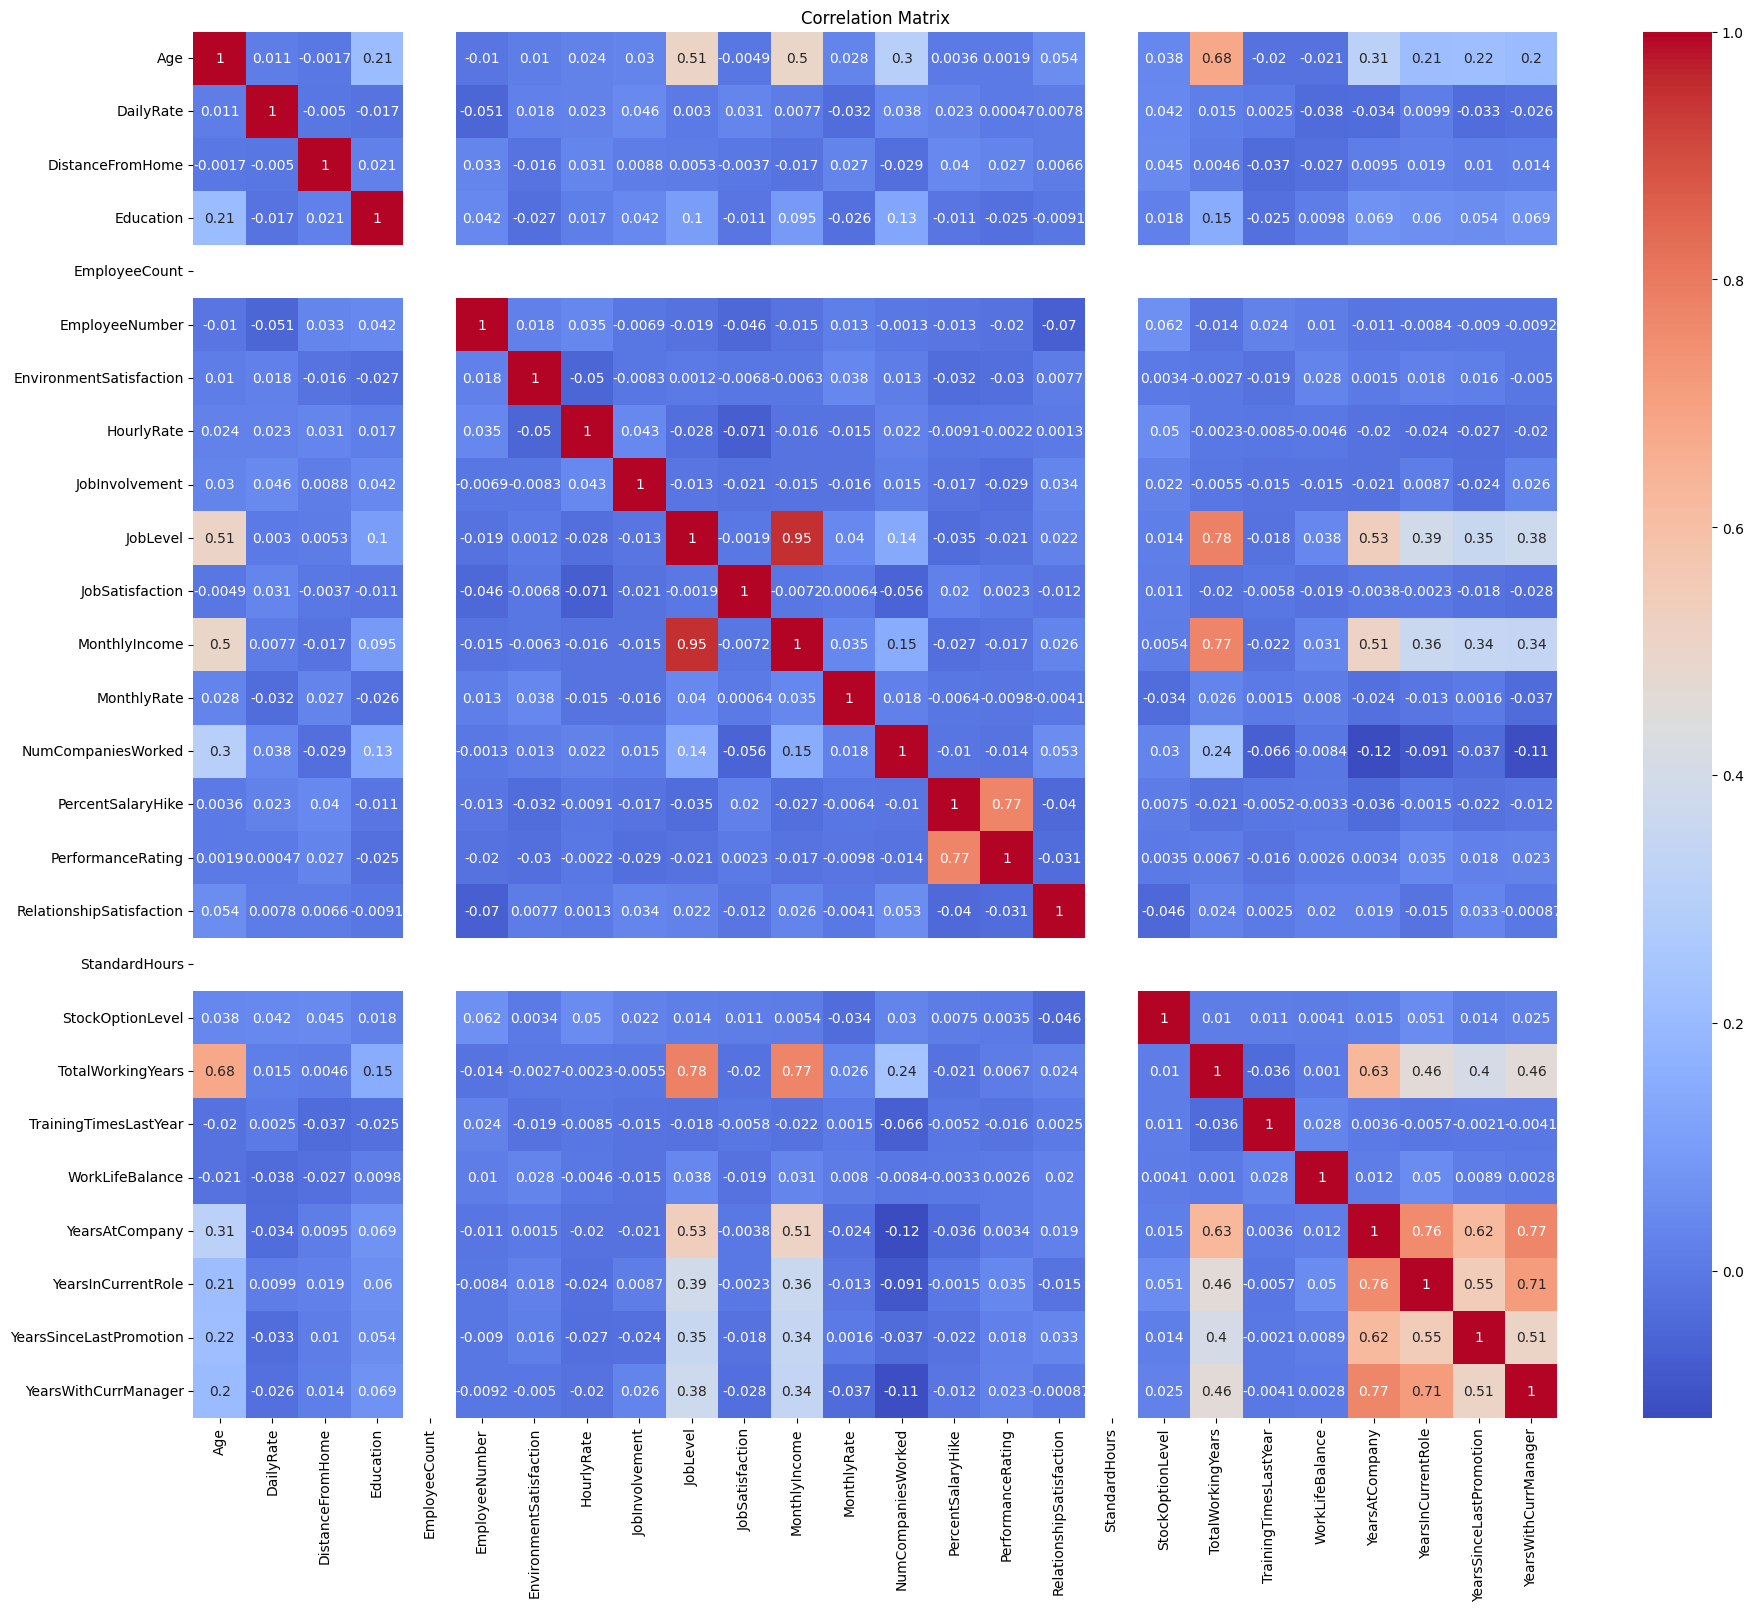

In [103]:
#Multivariate Analysis Example , # Correlation matrix , Relationships between variables
print("Correlation matrix:")
numeric_df=df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



  -  We have noticed that the diagonal in red with a value of 1 is as expected because each variable is perfectly correlated with itself. Additionally, some features have high correlation values close to 1 (e.g., 0.95) in the correlation matrix, indicating that they have similar effects on the dataset’s performance. Moreover, when examining how these variables affect other features, we observe a consistent pattern of influence.

    - The correlation matrix reveals the relationships between variables in the dataset. Variables with correlation coefficients close to +1 indicate a strong positive linear relationship, while those near -1 show a strong negative linear relationship.

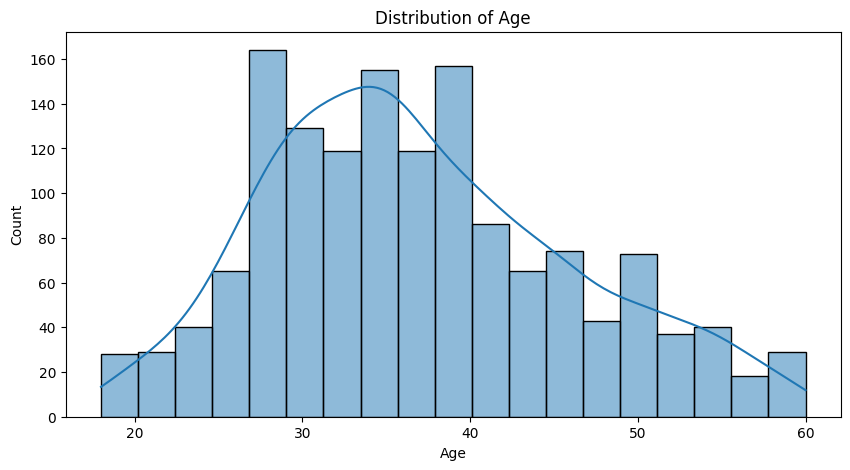

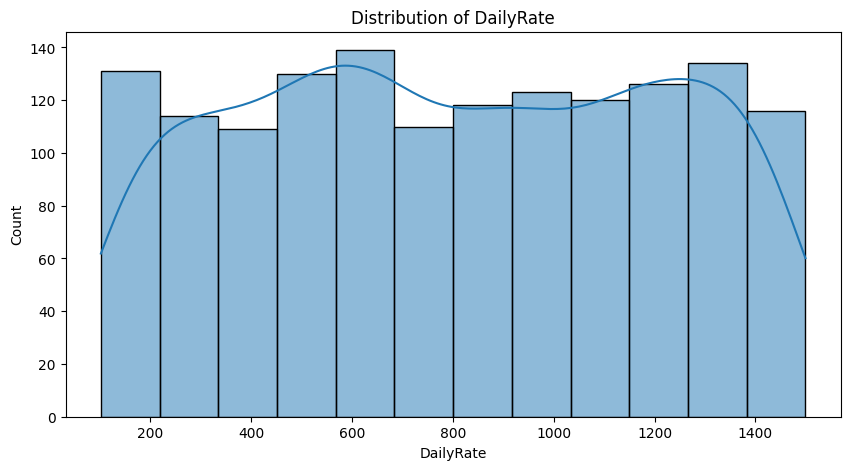

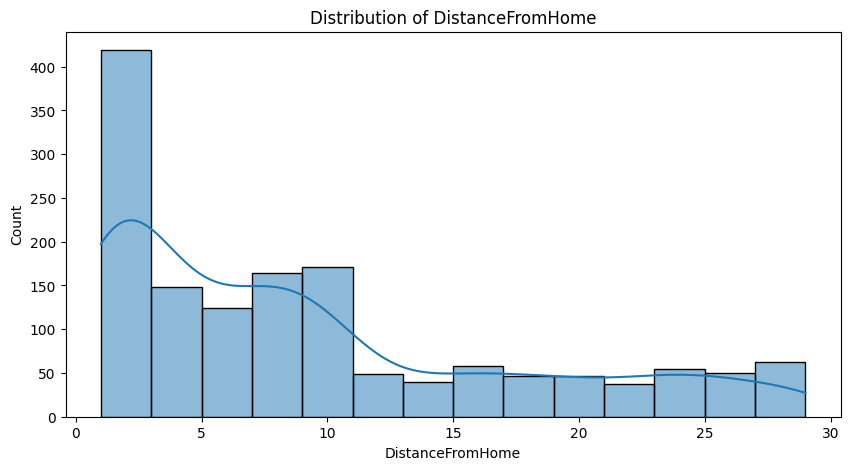

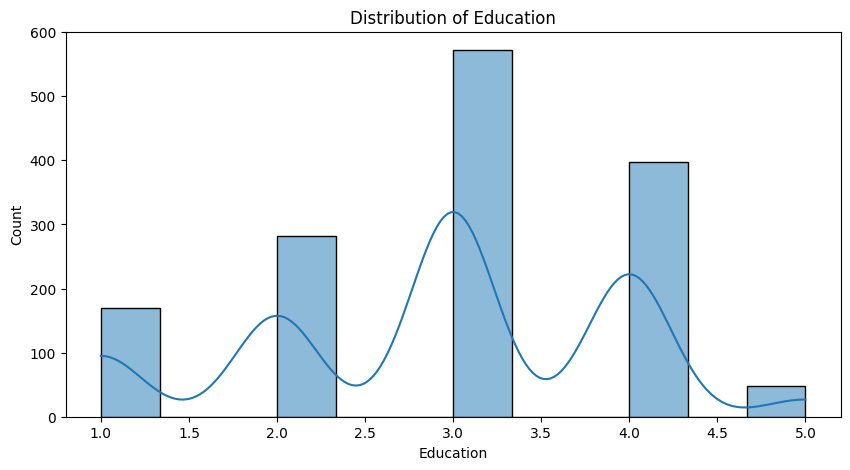

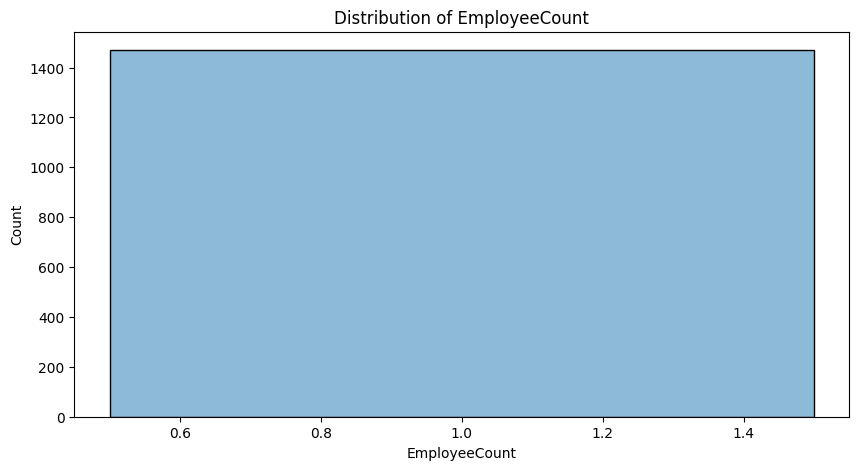

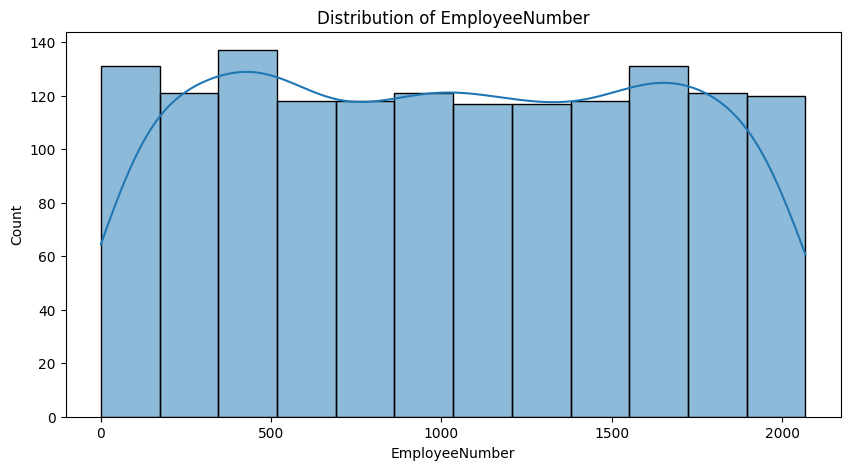

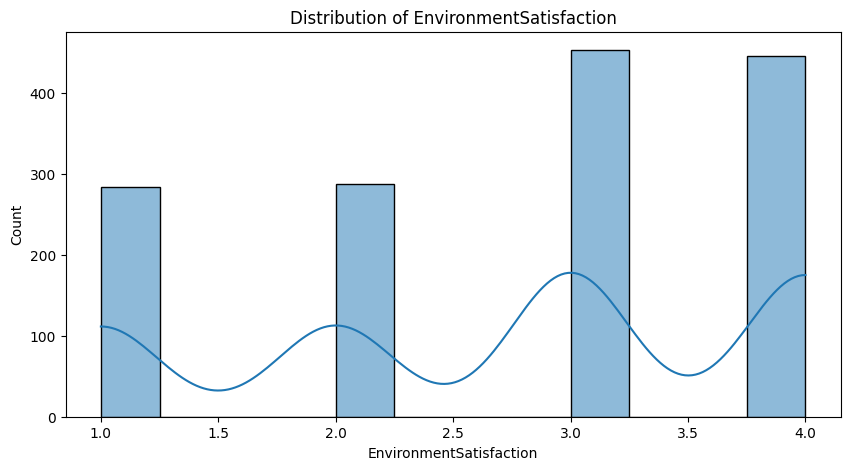

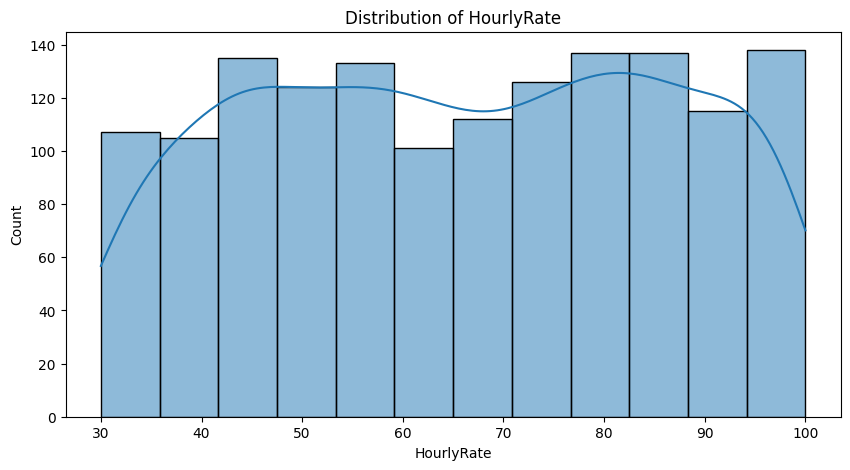

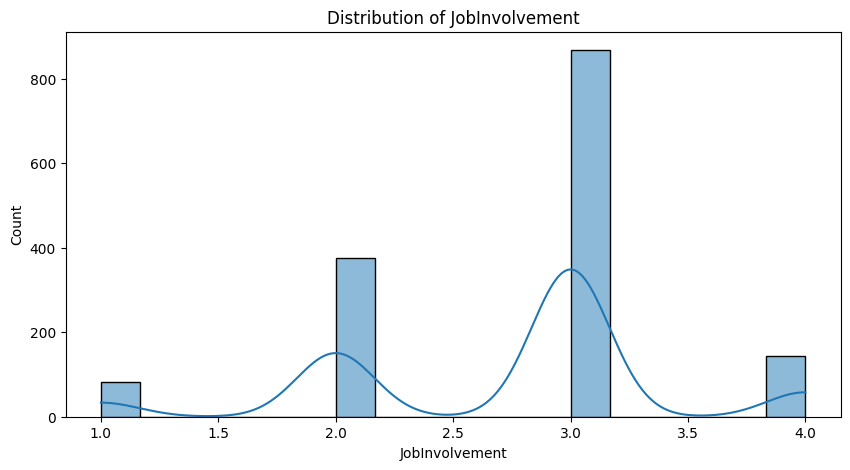

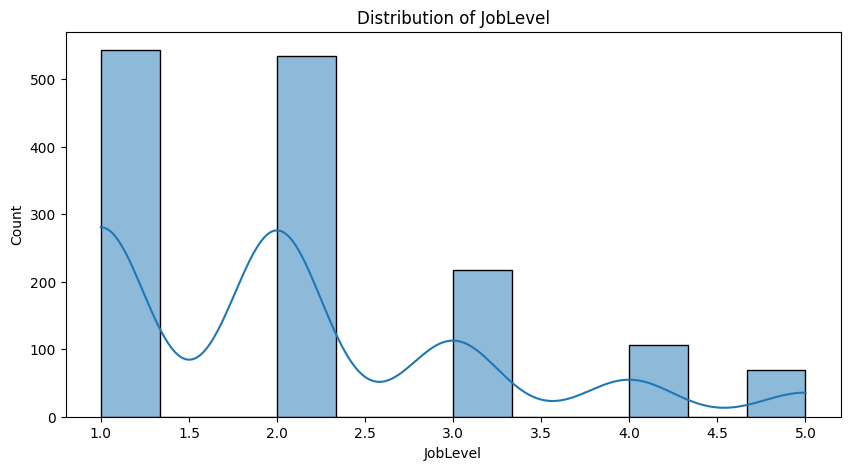

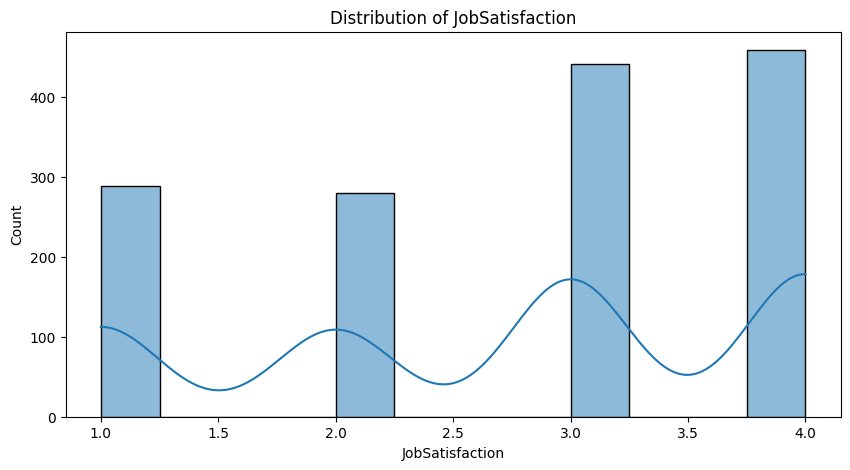

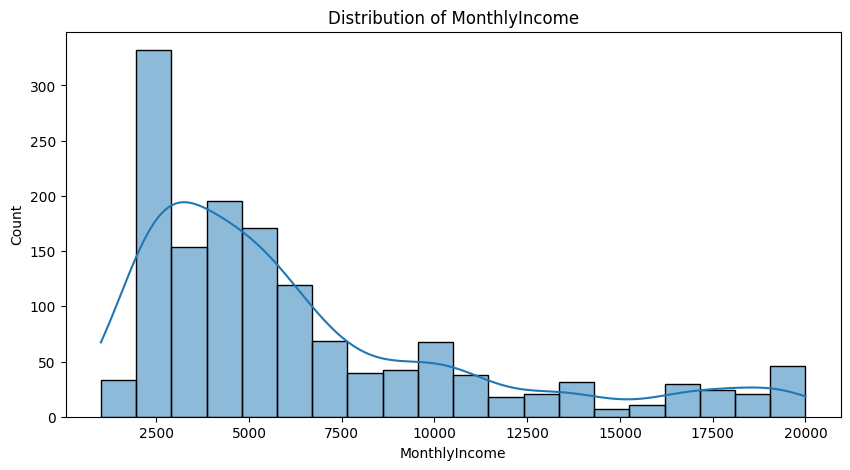

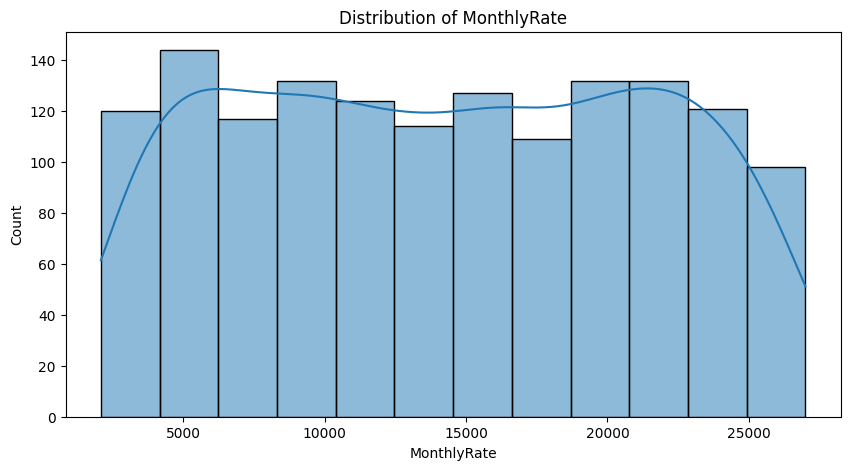

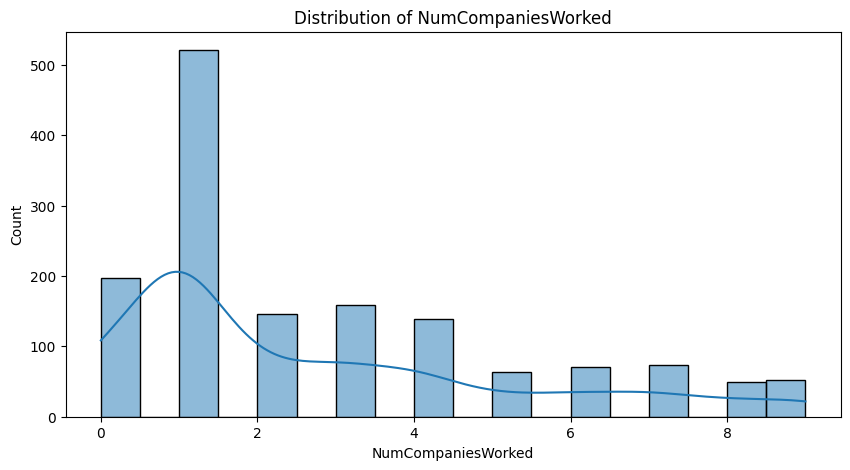

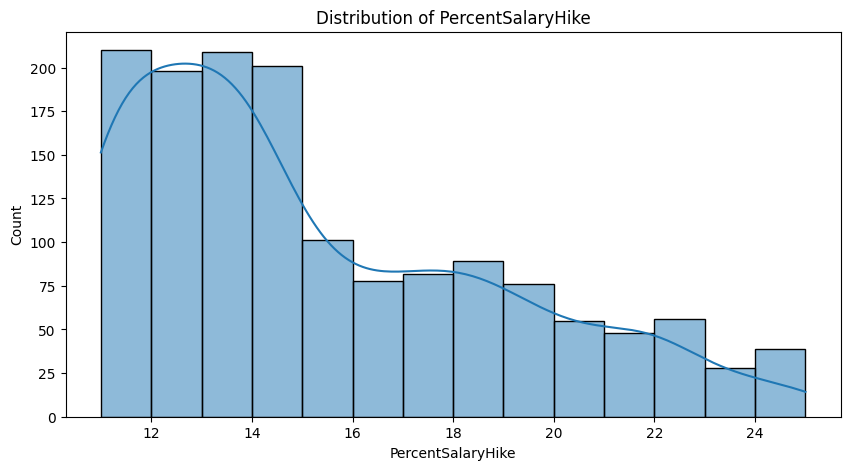

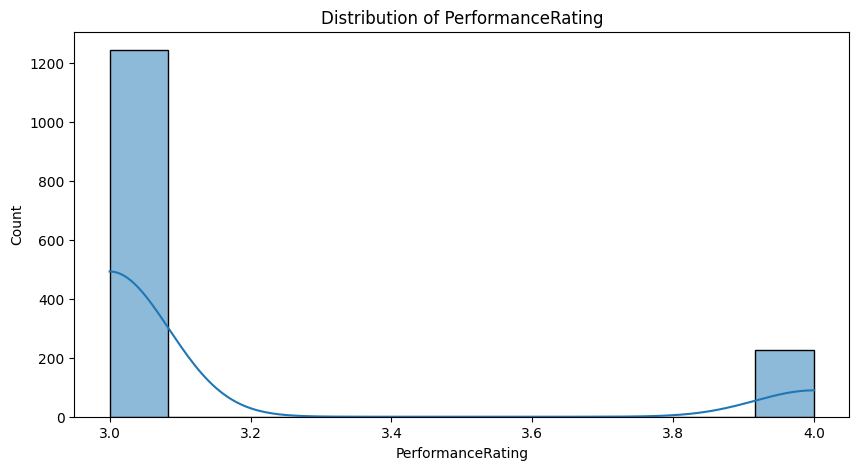

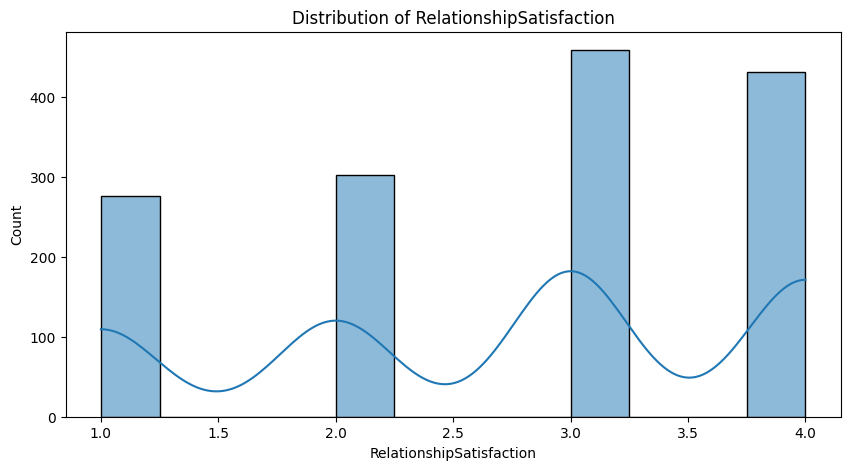

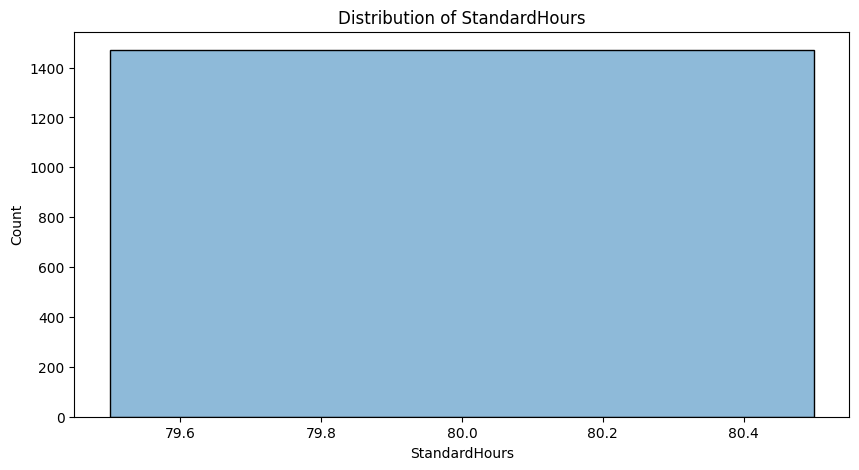

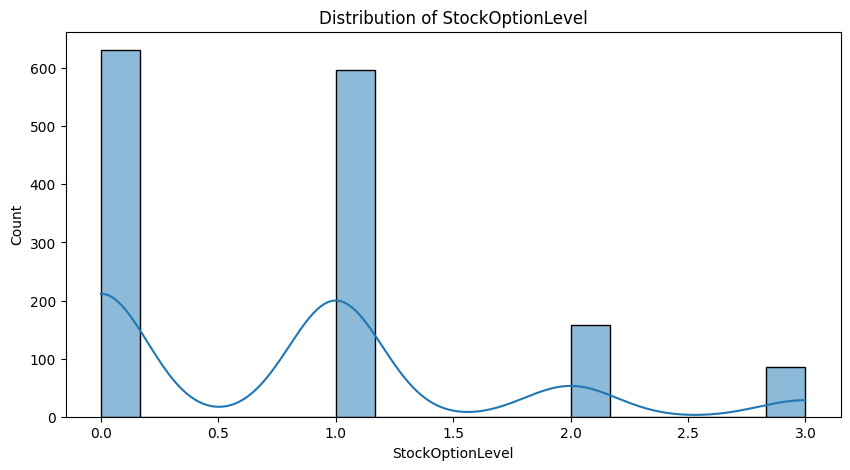

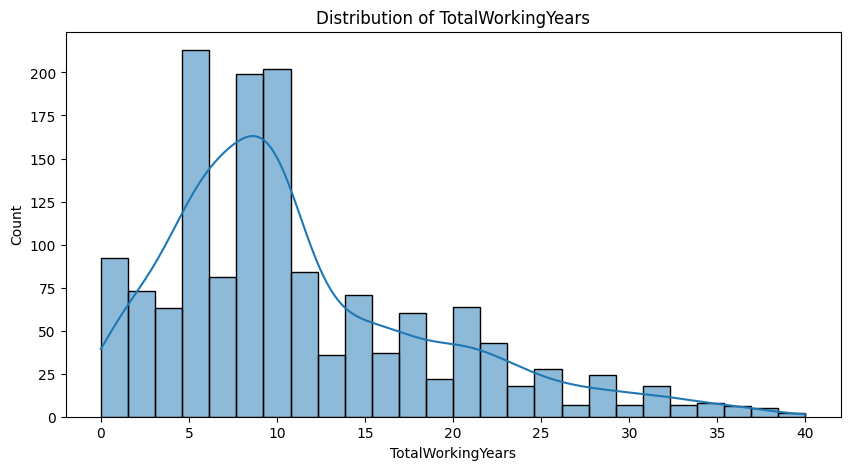

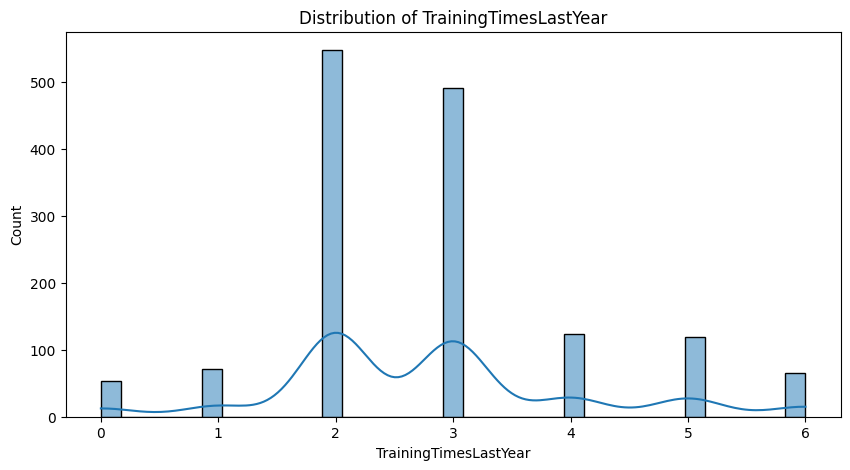

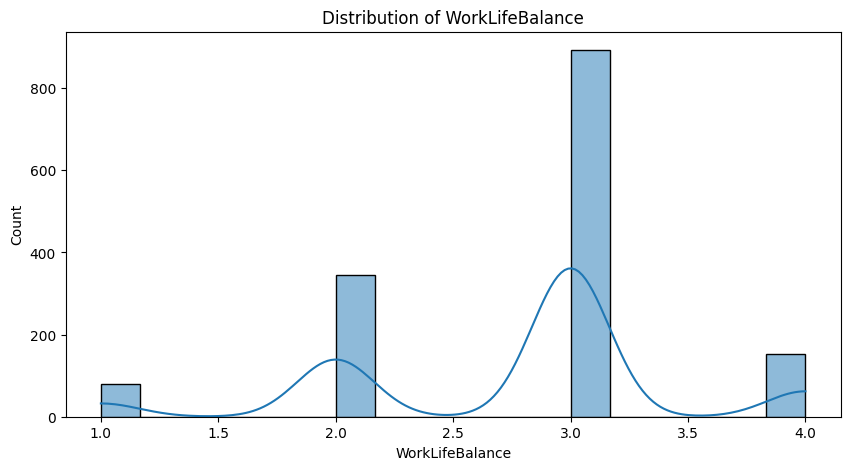

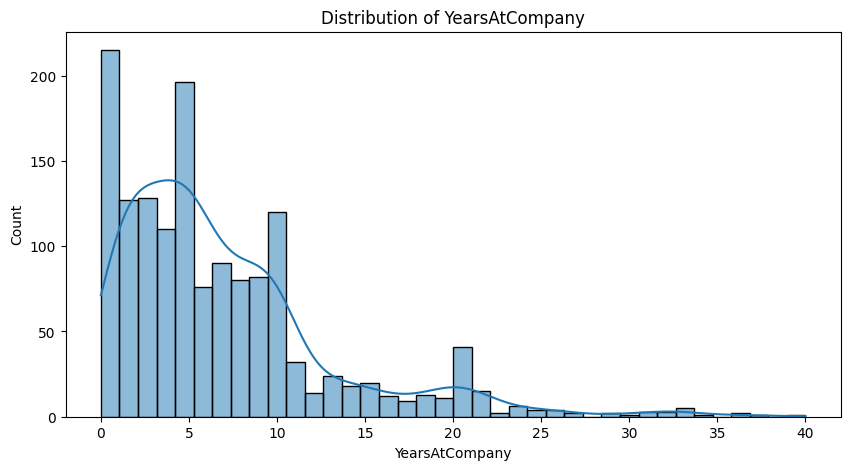

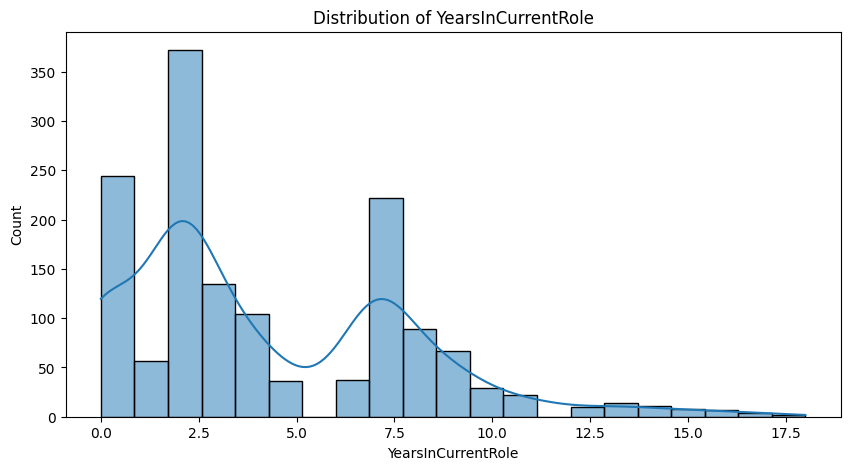

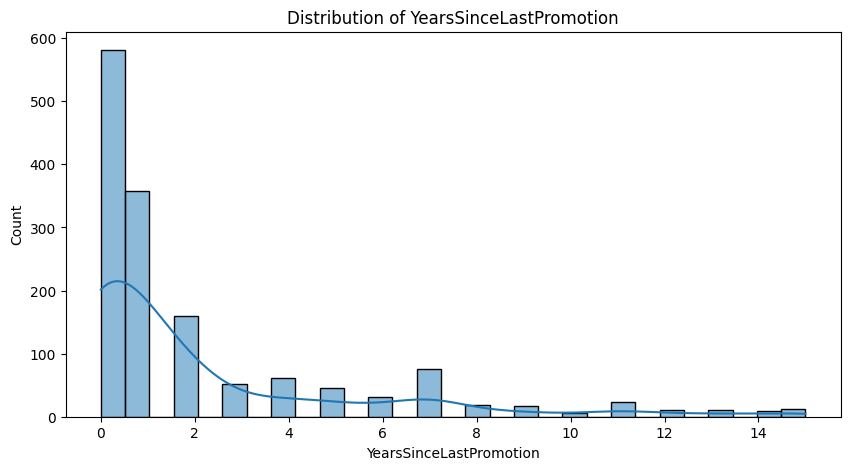

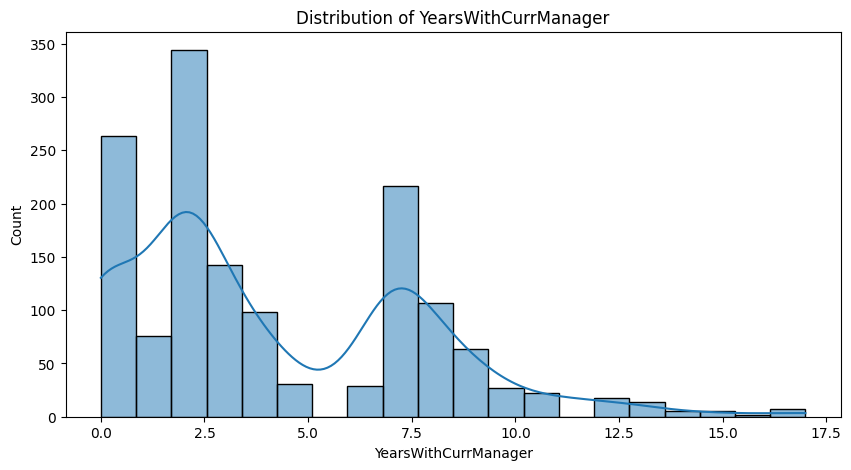

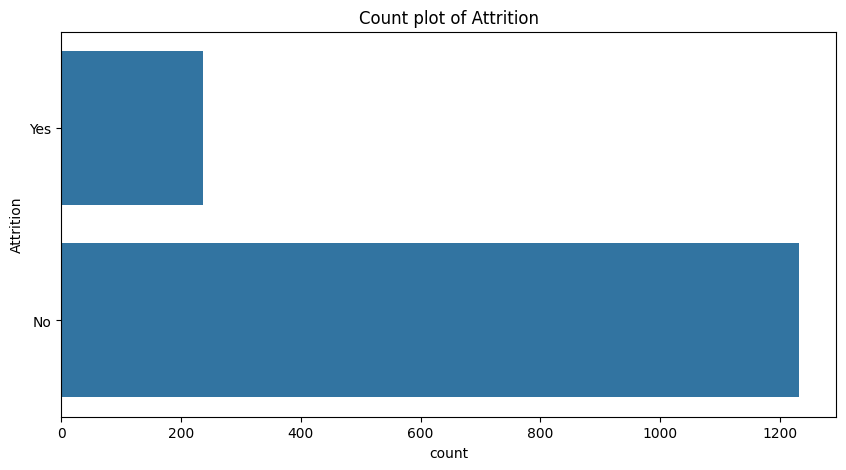

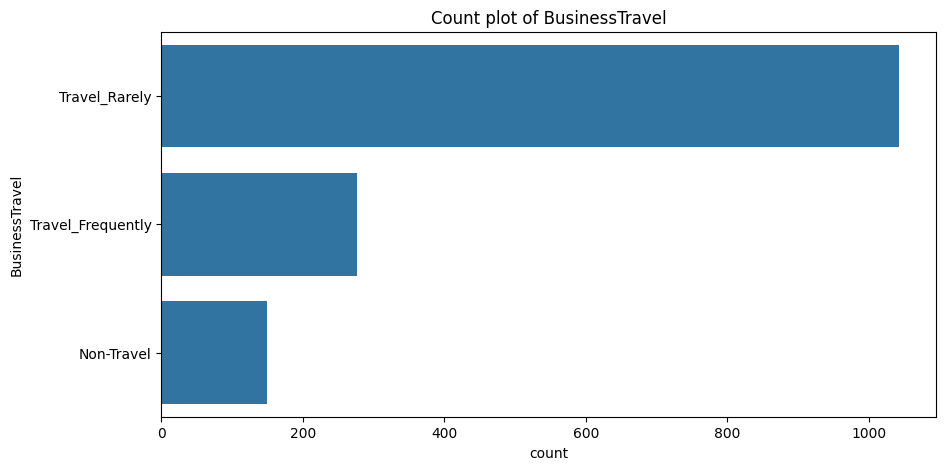

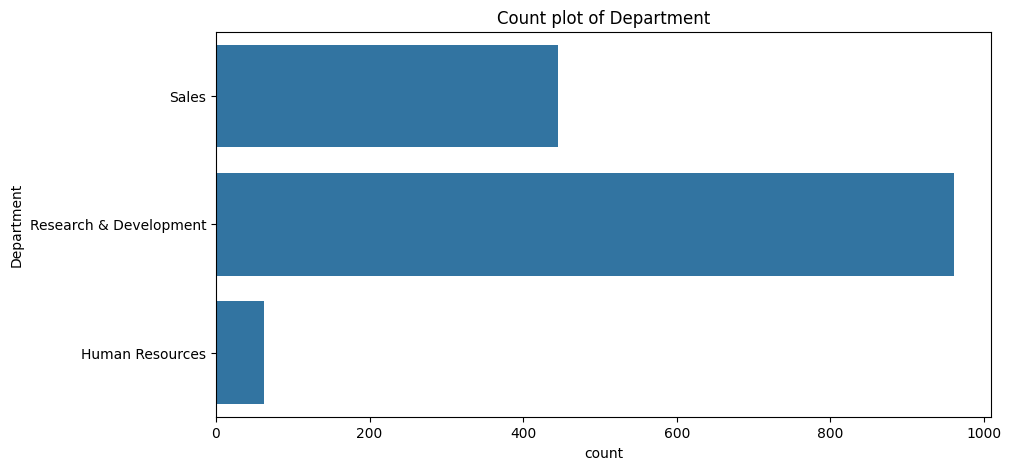

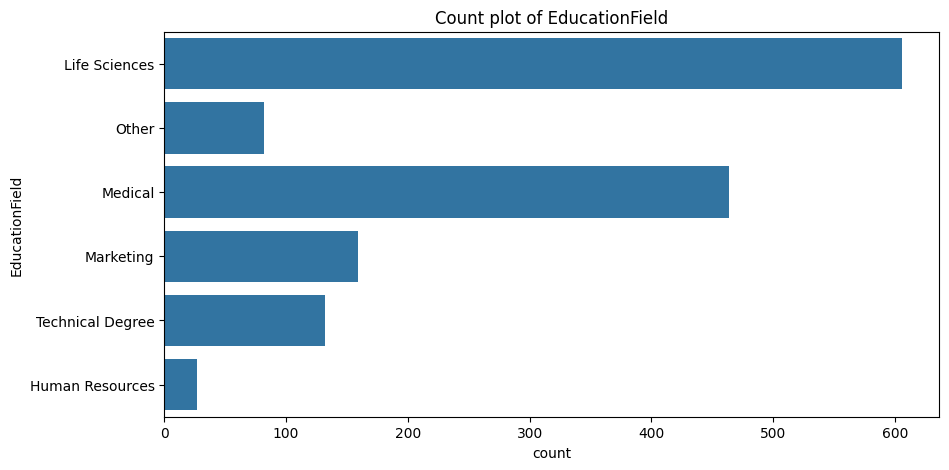

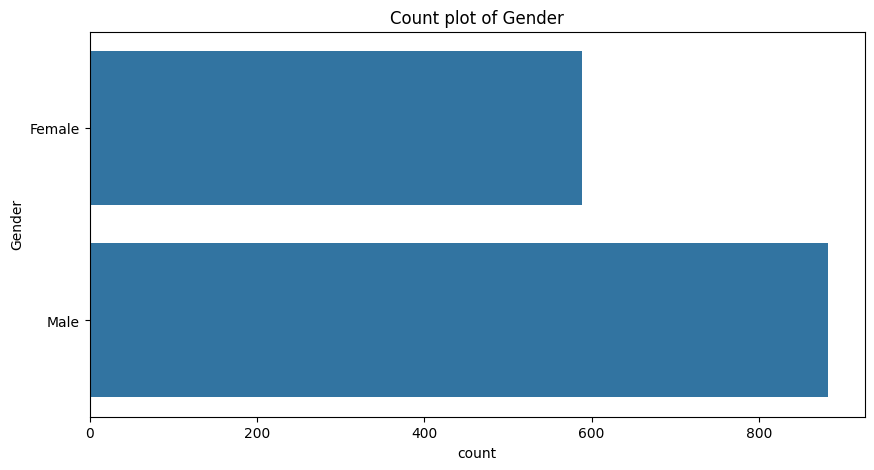

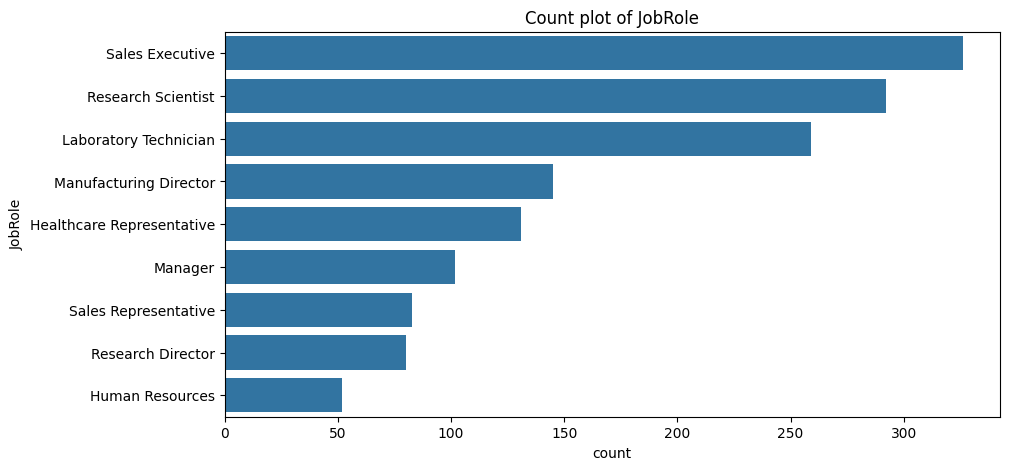

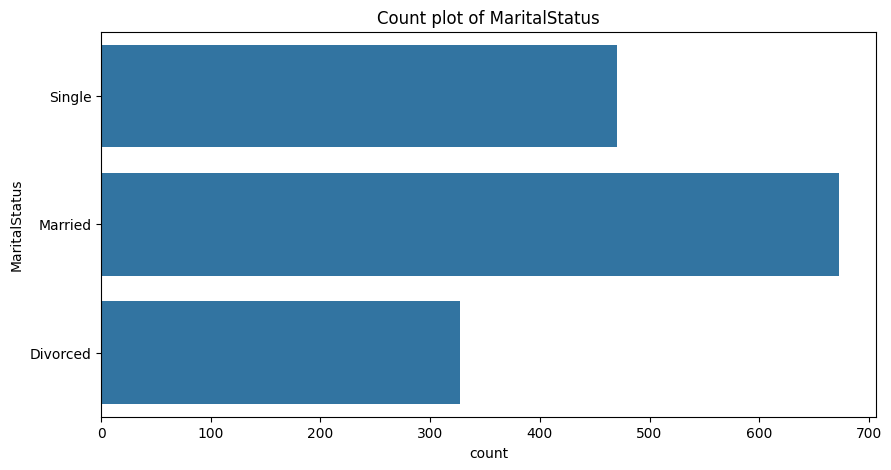

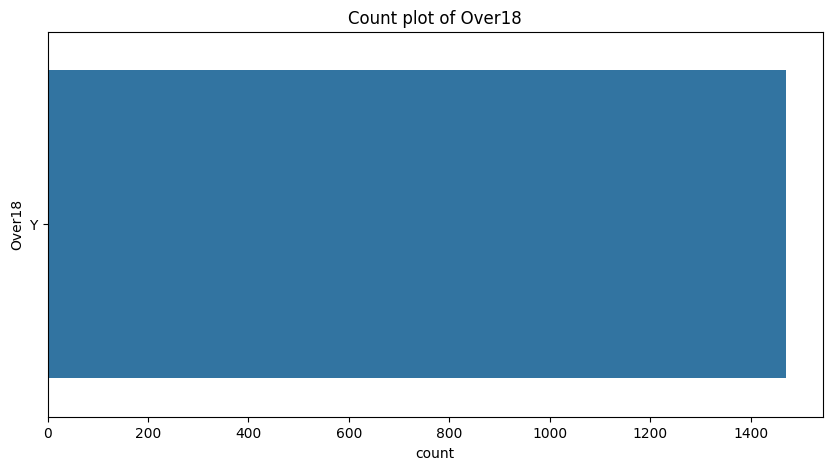

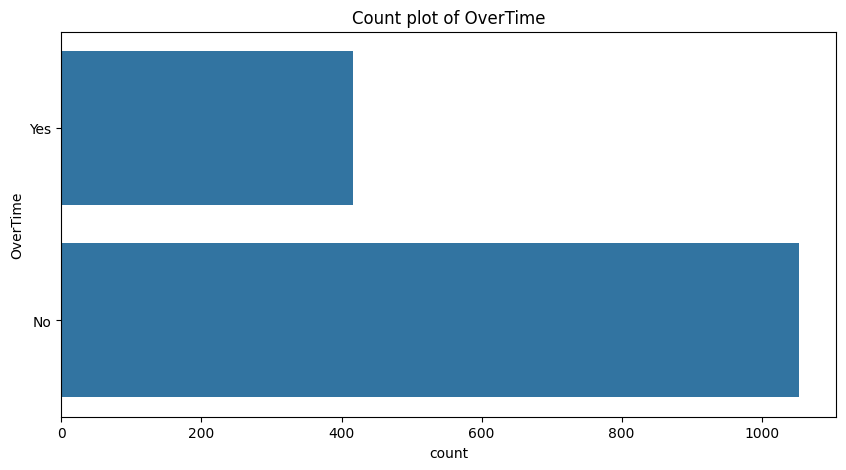

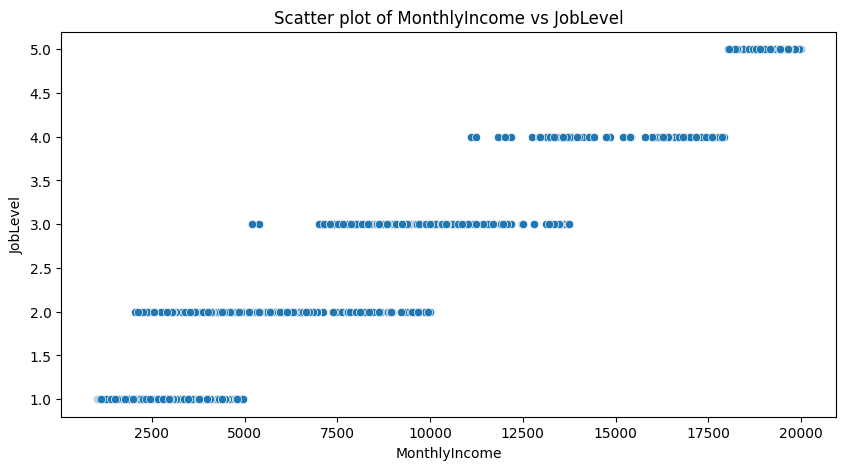

In [104]:
# Univariate Analysis - Distribution of numerical features
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Univariate Analysis - Categorical features
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df)
    plt.title(f'Count plot of {column}')
    plt.show()

# Bivariate Analysis - Scatter plot of highly correlated pairs
# Example: scatter plot of two columns with high correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='MonthlyIncome', y='JobLevel', data=df)
plt.title('Scatter plot of MonthlyIncome vs JobLevel')
plt.show()

- The scatter plot effectively shows that MonthlyIncome tends to increase as JobLevel increases, aligning with the expected trend in many organizations where higher job levels are typically associated with higher income. This absence of outliers further supports the correlation we discussed.

#**Data Cleaning**

1) Dropping irrelevant columns
  -  Both Over18, StandardHours, and EmployeeCount have constant values.
  -  The MonthlyRate column has 1427 unique values out of 1470 rows in the entire dataset, so it isn't useful to work with; it will just complicate our training.
  -  The EmployeeNumber column is not useful for analysis.
  -  the MonthlyIncome and JobLevel having a correlation coefficient of 0.95, suggests a high degree of linear association between these two features, so thats why we will the Remove MonthlyIncome to simplify your model, reduce multicollinearity.

In [105]:
columns_to_delete = ['Over18', 'StandardHours', 'MonthlyRate','EmployeeCount','MonthlyIncome','EmployeeNumber']
for col in columns_to_delete:
  if col in df.columns:
    df = df.drop(col, axis=1)

2) Dropping duplicated rows
  -   There is no duplicated rows

In [106]:
# There is no duplicated rows
print(df.duplicated().sum())


0


3) handling missing values

In [107]:
# There is no missing values
missing_values = df.isnull().sum()
print(missing_values)


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


4) Handling Outliers

In [108]:
df.shape
df_withOutliers=df

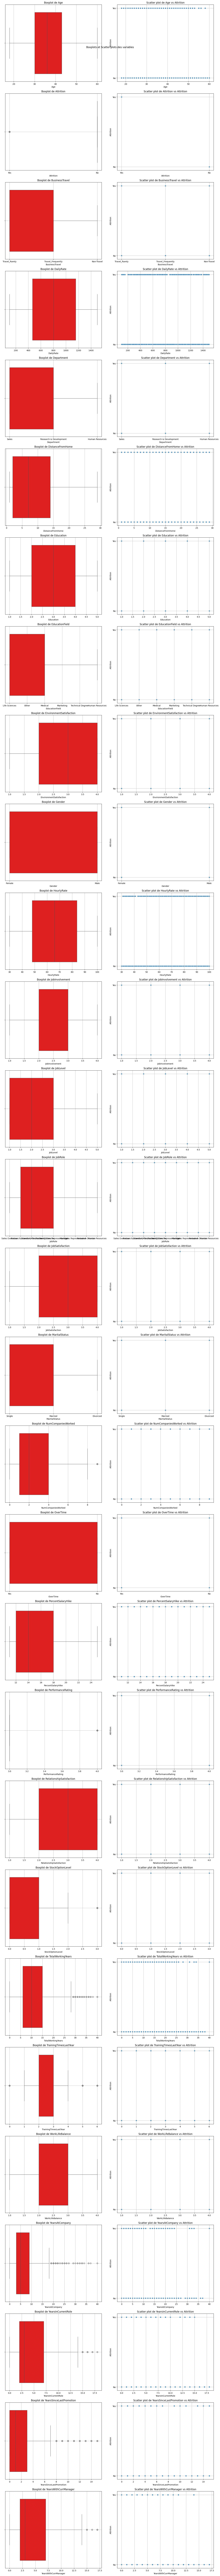

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_plot = df.columns

# Création des boxplots pour chaque colonne
fig, axes = plt.subplots(len(cols_to_plot), 2, figsize=(15, 6*len(cols_to_plot)), sharex=False)
fig.suptitle('Boxplots et Scatter plots des variables')

for i, col in enumerate(cols_to_plot):
    # Boxplot for each column to find the outliers
    sns.boxplot(x=df[col], color='red', ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot de {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].grid(True)

    #  Plot scatter plots for each feature against the target
    if 'Attrition' in df.columns:
        sns.scatterplot(data=df, x=col, y='Attrition', ax=axes[i, 1])
        axes[i, 1].set_title(f'Scatter plot de {col} vs Attrition')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Attrition')
        axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


In [110]:
import pandas as pd
# removing outliers based on IQR
def supprimer_outliers(df, colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    return df[(df[colonne] >= borne_inferieure) & (df[colonne] <= borne_superieure)]

# Liste des colonnes numériques pour lesquelles vous souhaitez supprimer les outliers
colonnes_numeriques = ['YearsSinceLastPromotion','YearsInCurrentRole']

# Affichage de la taille du dataframe avant et après la suppression des outliers (optionnel)
print("Taille du dataframe avant suppression des outliers :", df.shape)

# Suppression des outliers pour chaque colonne numérique
for col in colonnes_numeriques:
    df = supprimer_outliers(df, col)

# Réinitialisation de l'index du dataframe après la suppression des outliers (optionnel)
df.reset_index(drop=True, inplace=True)

# Affichage de la taille du dataframe après suppression des outliers (optionnel)
print("Taille du dataframe après suppression des outliers :", df.shape)


Taille du dataframe avant suppression des outliers : (1470, 29)
Taille du dataframe après suppression des outliers : (1353, 29)


In [111]:
df2=df_withOutliers

In [112]:
import pandas as pd
# removing outliers based on IQR
def supprimer_outliers(df2, colonne):
    Q1 = df2[colonne].quantile(0.25)
    Q3 = df2[colonne].quantile(0.75)
    IQR = Q3 - Q1
    borne_inferieure = Q1 - 1.5 * IQR
    borne_superieure = Q3 + 1.5 * IQR
    return df2[(df2[colonne] >= borne_inferieure) & (df2[colonne] <= borne_superieure)]

# Liste des colonnes numériques pour lesquelles vous souhaitez supprimer les outliers
colonnes_numeriques = ['YearsAtCompany','YearsSinceLastPromotion','YearsInCurrentRole','TrainingTimesLastYear']

# Affichage de la taille du dataframe avant et après la suppression des outliers (optionnel)
print("Taille du dataframe avant suppression des outliers :", df2.shape)

# Suppression des outliers pour chaque colonne numérique
for col in colonnes_numeriques:
    df2 = supprimer_outliers(df2, col)

# Réinitialisation de l'index du dataframe après la suppression des outliers (optionnel)
df2.reset_index(drop=True, inplace=True)

# Affichage de la taille du dataframe après suppression des outliers (optionnel)
print("Taille du dataframe après suppression des outliers :", df2.shape)


Taille du dataframe avant suppression des outliers : (1470, 29)
Taille du dataframe après suppression des outliers : (969, 29)


#**Data Encoding**

- Transforming categorical data into a numerical format
- **Label Encoding** converts categorical values to integer labels, which can be suitable for ordinal data but might mislead the model for nominal data by introducing an implied ordering.
- **One-Hot Encoding** represents categorical values as binary vectors, avoiding any implied ordering, but can increase the dimensionality of the data.
- **Target Encoding** for those with many unique values aims to transform categorical variables into numeric representations based on their relationship with the target variable, enhancing predictive model performance.

In [113]:
# Transforming the 'Attrition' target and the 'OverTime' feature from 'Yes/No' to binary format
#label encoding (Yes → 1, No → 0) for Binary Columns.
# Binary columns to encode using label encoding

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
df['Attrition']=encoder1.fit_transform(df['Attrition'])
df['OverTime']=encoder1.fit_transform(df['OverTime'])
print(df['Attrition'])
print(df['OverTime'])

0       1
1       0
2       1
3       0
4       0
       ..
1348    0
1349    0
1350    0
1351    0
1352    0
Name: Attrition, Length: 1353, dtype: int64
0       1
1       0
2       1
3       1
4       0
       ..
1348    0
1349    0
1350    1
1351    0
1352    0
Name: OverTime, Length: 1353, dtype: int64


- 31 Columns ->  36 Columns : Each unique category in a nominal column creates a new binary column
- Gender: 2 unique values → 1 binary column .
- MaritalStatus: 3 unique values → 2 binary columns .
- BusinessTravel: 3 unique values → 2 binary columns .
- Department: 3 unique values → 2 binary columns .

In [114]:
!pip install category_encoders


EducationField_TargetEncoded
0.145683    556
0.142180    422
0.234899    149
0.249996    120
0.137569     80
0.232495     26
Name: count, dtype: int64


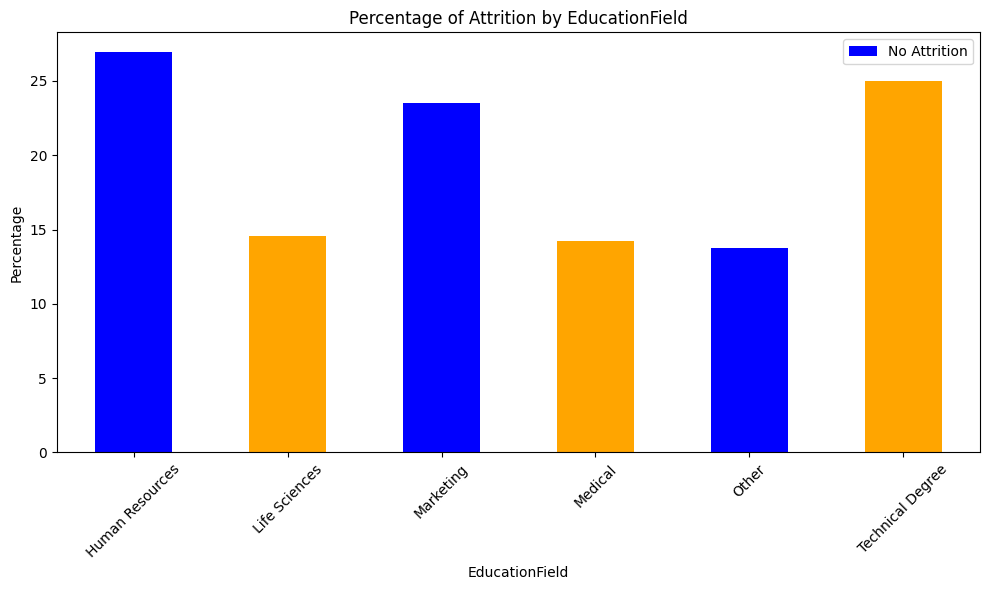

In [115]:
from category_encoders import TargetEncoder
import pandas as pd

# Assuming df contains your original DataFrame with 'EducationField' and 'Attrition'

# Initialize TargetEncoder
encoderEducField = TargetEncoder()

# Fit and transform the categorical column(s)
df['EducationField_TargetEncoded'] = encoderEducField.fit_transform(df['EducationField'], df['Attrition'])

# Check the encoded values
print(df['EducationField_TargetEncoded'].value_counts())

# Plotting example (as per your code snippet)
EducationField_stats = df.groupby('EducationField')['Attrition'].mean() * 100

plt.figure(figsize=(10, 6))
EducationField_stats.plot(kind='bar', color=['blue', 'orange'])
plt.title('Percentage of Attrition by EducationField')
plt.xlabel('EducationField')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['No Attrition', 'Attrition'])
plt.tight_layout()
plt.show()

# Reassign the original 'EducationField' with the encoded values
df['EducationField'] = df['EducationField_TargetEncoded']

# Drop the temporary encoded column
df.drop('EducationField_TargetEncoded', axis=1, inplace=True)


In [116]:
df.EducationField.unique()

array([0.14568345, 0.13756938, 0.14218009, 0.23489916, 0.24999617,
       0.23249498])

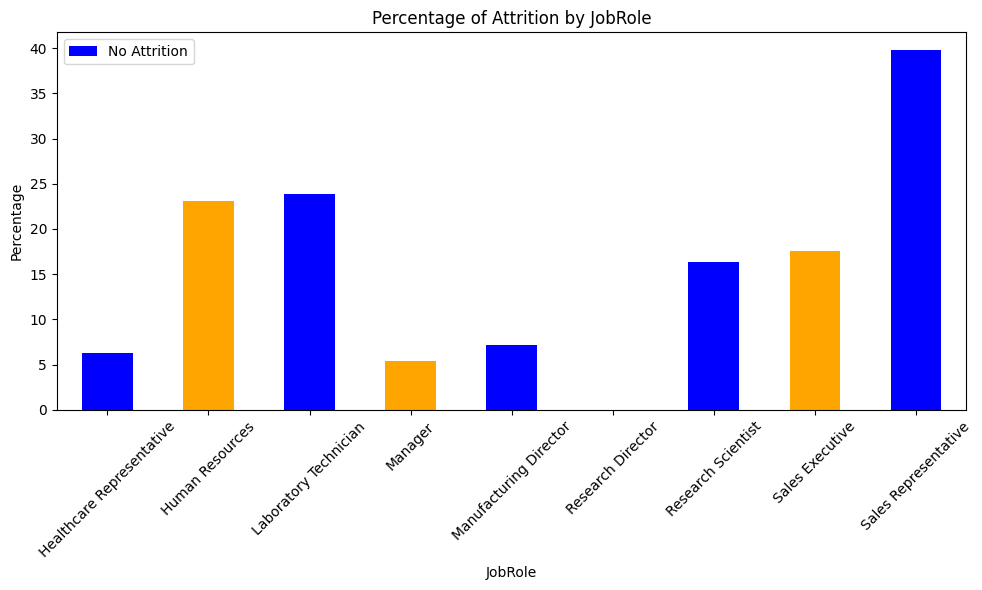

In [117]:
# Initialize TargetEncoder
encoderRole = TargetEncoder()

# Fit and transform the categorical column(s)
df['JobRole_TargetEncoded'] = encoderRole.fit_transform(df['JobRole'], df['Attrition'])

# Group by JobRole and calculate the percentage of Attrition ('Yes' and 'No')
jobrole_stats = df.groupby('JobRole')['Attrition'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
jobrole_stats.plot(kind='bar', color=['blue', 'orange'])
plt.title('Percentage of Attrition by JobRole')
plt.xlabel('JobRole')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['No Attrition', 'Attrition'])
plt.tight_layout()
plt.show()

df['JobRole'] = df['JobRole_TargetEncoded']
df.drop(columns=['JobRole_TargetEncoded'], axis=1, inplace=True)

**One-Hot Encoding**

In [118]:
# Nominal Categorical Columns (Gender, MaritalStatus, BusinessTravel, Department, JobRole, EducationField)
# We'll use one-hot encoding to ensure no implicit ordering is inferred by the model.
# !This will expand the dataset by creating binary columns for each category, increasing the total number of columns.

nominal_columns = ['BusinessTravel', 'Department', 'Gender', 'MaritalStatus']
df= pd.get_dummies(df, columns=nominal_columns, drop_first=True)
print(df.head())
df.JobRole.unique()

   Age  Attrition  DailyRate  DistanceFromHome  Education  EducationField  \
0   41          1       1102                 1          2        0.145683   
1   49          0        279                 8          1        0.145683   
2   37          1       1373                 2          2        0.137569   
3   33          0       1392                 3          4        0.145683   
4   27          0        591                 2          1        0.142180   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   4     

array([0.17567568, 0.16312057, 0.23904382, 0.07194308, 0.06251041,
       0.05455541, 0.39716506, 0.00200796, 0.22821519])

In [119]:
df.JobRole.unique()

array([0.17567568, 0.16312057, 0.23904382, 0.07194308, 0.06251041,
       0.05455541, 0.39716506, 0.00200796, 0.22821519])

- Feature Selection Using **Mutual Information** to Optimize Machine Learning Models

In [120]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

X = df.drop('Attrition', axis=1)
y = df['Attrition']
X.JobRole.unique()
print(X.JobRole)
# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y)

# Convert MI scores into a DataFrame for easier analysis to select the features that we will keep
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Display MI scores
print(mi_scores_df)


# Select features with MI score greater than 0
selected_features = mi_scores_df[mi_scores_df['MI Score']>0 ].index
X = X[selected_features]


0       0.175676
1       0.163121
2       0.239044
3       0.163121
4       0.239044
          ...   
1348    0.239044
1349    0.062510
1350    0.071943
1351    0.175676
1352    0.239044
Name: JobRole, Length: 1353, dtype: float64
                                   MI Score
JobRole                            0.048115
OverTime                           0.040442
Age                                0.028984
JobInvolvement                     0.023672
Department_Sales                   0.023231
TotalWorkingYears                  0.021642
StockOptionLevel                   0.021472
MaritalStatus_Single               0.019946
JobLevel                           0.019468
YearsAtCompany                     0.017114
JobSatisfaction                    0.015004
EducationField                     0.014473
YearsInCurrentRole                 0.009774
DailyRate                          0.008746
YearsSinceLastPromotion            0.008557
EnvironmentSatisfaction            0.007966
YearsWithCurrManager 

In [121]:
Original_X=X[selected_features]

- Normalisation of data using standardisation

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X =scaler.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


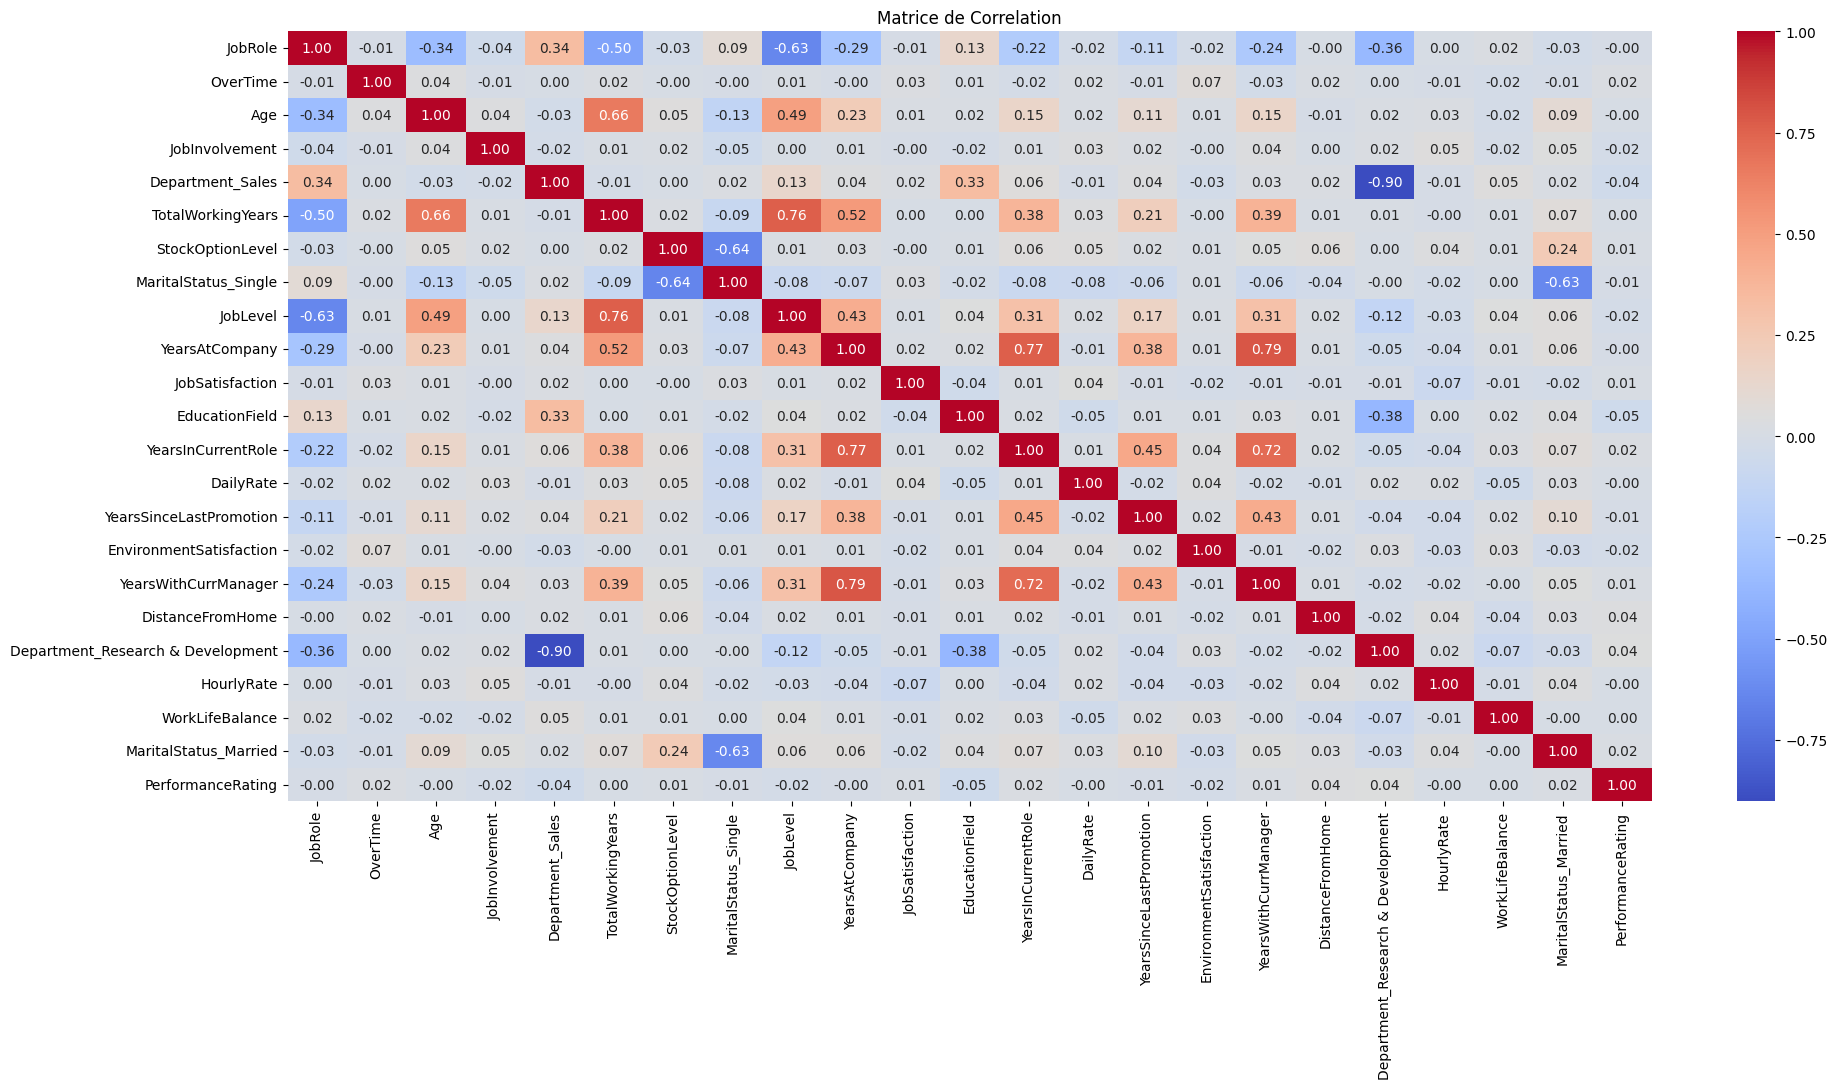

In [123]:
#Just to see the correlation matrix again
X_scaled_df = pd.DataFrame(X, columns=Original_X.columns)
correlation_matrix = X_scaled_df.corr()

plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matrice de Correlation')
plt.show()

#**Data Labelling**

-  **SMOTE** (Synthetic Minority Over-sampling Technique) addresses the issue of imbalanced datasets in classification tasks where one class is significantly underrepresented compared to another.
It works by generating synthetic samples for the minority class based on its existing instances. For each minority class instance, SMOTE selects similar instances and creates new synthetic examples along the line segments joining them. This approach helps to balance the class distribution, improving the model's ability to learn from the minority class and thereby enhancing overall classification performance, especially in terms of metrics like precision, recall, and F1 score for the minority class. However, it's important to fine-tune parameters like the number of nearest neighbors to balance between oversampling and introducing noise into the data.

In [124]:
test_counts = y.value_counts()
print("\nDistribution in y_test:")
print(test_counts)

#Having an imbalance between the "Yes" and "No" classes can pose a problem in data analysis.
#When the "Yes" class (typically represented by 1 in our target variable y) is less frequent compared to the "No" class (0),
# it can adversely affect the model's ability to accurately learn from and predict the minority class.


Distribution in y_test:
Attrition
0    1129
1     224
Name: count, dtype: int64


In [125]:
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

In [126]:

# Définir K-fold Cross-Validation with K=5
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialiser SMOTE
smote = SMOTE(random_state=42)


#2- Second Tasks : Building Machine Learning Models (Only For ML and Data Scientist Team)

1. Perform **regression** and **classification** Models:
-  **Classification Models**
We chose classification models because we have a discrete column with yes/no values.

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

1. **Logistic Regression Classifier.**

In [128]:

#The default value is usually 100. Setting max_iter=1000 increases this limit,
# ensures that the solver has enough time to find the optimal solution. to converge.

#class_weight='balanced':This helps the model to handle the imbalance by giving more importance to the minority class.
#liblinear is particularly effective for  small datasets(for fast optimization).
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', C=0.1, solver='liblinear')

#using  Cross-Validation for the prediction
y_predReg = cross_val_predict(log_reg, X, y, cv=k_fold)


In [129]:

conf_matReg = confusion_matrix(y, y_predReg)
print("Confusion Matrix:\n", conf_matReg)

accuracyReg = accuracy_score(y,y_predReg)
print("Accuracy:", accuracyReg)


f1_Reg = f1_score(y, y_predReg)
print('f1_Reg:',f1_Reg)

Confusion Matrix:
 [[858 271]
 [ 60 164]]
Accuracy: 0.7553584626755359
f1_Reg: 0.4977238239757207


2.  **RandomForest Classifier**

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

# Initialiser le modèle de RandomForestClassifier
rnd_clf = RandomForestClassifier()

#class_weight='balanced':This helps the model to handle the imbalance by giving more importance to the minority class.
#liblinear is particularly effective for  small datasets(for fast optimization).
X_resampled, y_resampled = smote.fit_resample(X, y)
y_pred = cross_val_predict(rnd_clf, X_resampled, y_resampled, cv=k_fold)

# Calculer la matrice de confusion
conf_mat = confusion_matrix(y_resampled, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Calculer l'exactitude
accuracy = accuracy_score(y_resampled, y_pred)
print("Accuracy:", accuracy)

f1_mat = f1_score(y_resampled, y_pred)
print('f1_mat:',f1_mat)

Confusion Matrix:
 [[1076   53]
 [ 114 1015]]
Accuracy: 0.9260407440212578
f1_mat: 0.9239872553482021


- **Nonlinear SVM** with SMOT

```
# Ce texte est au format code
```



In [131]:
# Initialiser le modèle SVM avec class_weight='balanced'
svm_clf = SVC(kernel='rbf', gamma=0.01, C=1000, class_weight='balanced')


X_resampled, y_resampled = smote.fit_resample(X, y)

# Effectuer la prédiction avec Cross-Validation en utilisant les données resamplées
y_predSvm = cross_val_predict(svm_clf, X_resampled, y_resampled, cv=k_fold)


conf_matSvm = confusion_matrix(y_resampled, y_predSvm)
print("Confusion Matrix:\n", conf_matSvm)

# Calculer l'exactitude
accuracySvm = accuracy_score(y_resampled, y_predSvm)
print("Accuracy:", accuracySvm)

f1_svm = f1_score(y_resampled, y_predSvm)
print('f1_svm:',f1_svm)

Confusion Matrix:
 [[ 958  171]
 [  32 1097]]
Accuracy: 0.9100974313551816
f1_svm: 0.915310805173133


**Decision Tree Classifier**

In [132]:

# Initialiser le modèle Decision Tree Classifier
dt_clf = DecisionTreeClassifier()


# Appliquer SMOTE sur les données
X_resampled, y_resampled = smote.fit_resample(X, y)

# Effectuer la prédiction avec Cross-Validation en utilisant les données resamplées
y_pred_dt = cross_val_predict(dt_clf, X_resampled, y_resampled, cv=k_fold)

# Calculer la matrice de confusion
conf_mat_dt = confusion_matrix(y_resampled, y_pred_dt)
print("Confusion Matrix:\n", conf_mat_dt)

# Calculer l'exactitude
accuracy_dt = accuracy_score(y_resampled, y_pred_dt)
print("Accuracy:", accuracy_dt)

f1_dt = f1_score(y_resampled, y_pred_dt)
print('f1_knn:',f1_dt)

Confusion Matrix:
 [[925 204]
 [161 968]]
Accuracy: 0.8383525243578388
f1_knn: 0.8413733159495872


- **Naive Bayes Model**

In [133]:
# Initialize the Naive Bayes model (GaussianNB)
nb_clf = GaussianNB()

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform prediction with Cross-Validation using the resampled data
y_pred_nb = cross_val_predict(nb_clf, X_resampled, y_resampled, cv=k_fold)

# Calculate the confusion matrix
conf_mat_nb = confusion_matrix(y_resampled, y_pred_nb)
print("Confusion Matrix:\n", conf_mat_nb)

# Calculate accuracy
accuracy_nb = accuracy_score(y_resampled, y_pred_nb)
print("Accuracy:", accuracy_nb)

# Calculate F1 score
f1_nb = f1_score(y_resampled, y_pred_nb)
print('F1 Score:', f1_nb)


Confusion Matrix:
 [[689 440]
 [251 878]]
Accuracy: 0.6939769707705934
F1 Score: 0.7176134041683694


 **KNeighbors** Classifier

In [134]:
# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform prediction with Cross-Validation using the resampled data
y_pred_knn = cross_val_predict(knn_clf, X_resampled, y_resampled, cv=k_fold)

# Calculate the confusion matrix
conf_mat_knn = confusion_matrix(y_resampled, y_pred_knn)
print("Confusion Matrix:\n", conf_mat_knn)

# Calculate the accuracy
accuracy_knn = accuracy_score(y_resampled, y_pred_knn)
print("Accuracy:", accuracy_knn)

f1_knn = f1_score(y_resampled, y_pred_knn)
print('f1_knn:',f1_knn)

Confusion Matrix:
 [[ 790  339]
 [  51 1078]]
Accuracy: 0.8272807794508414
f1_knn: 0.8468185388845249


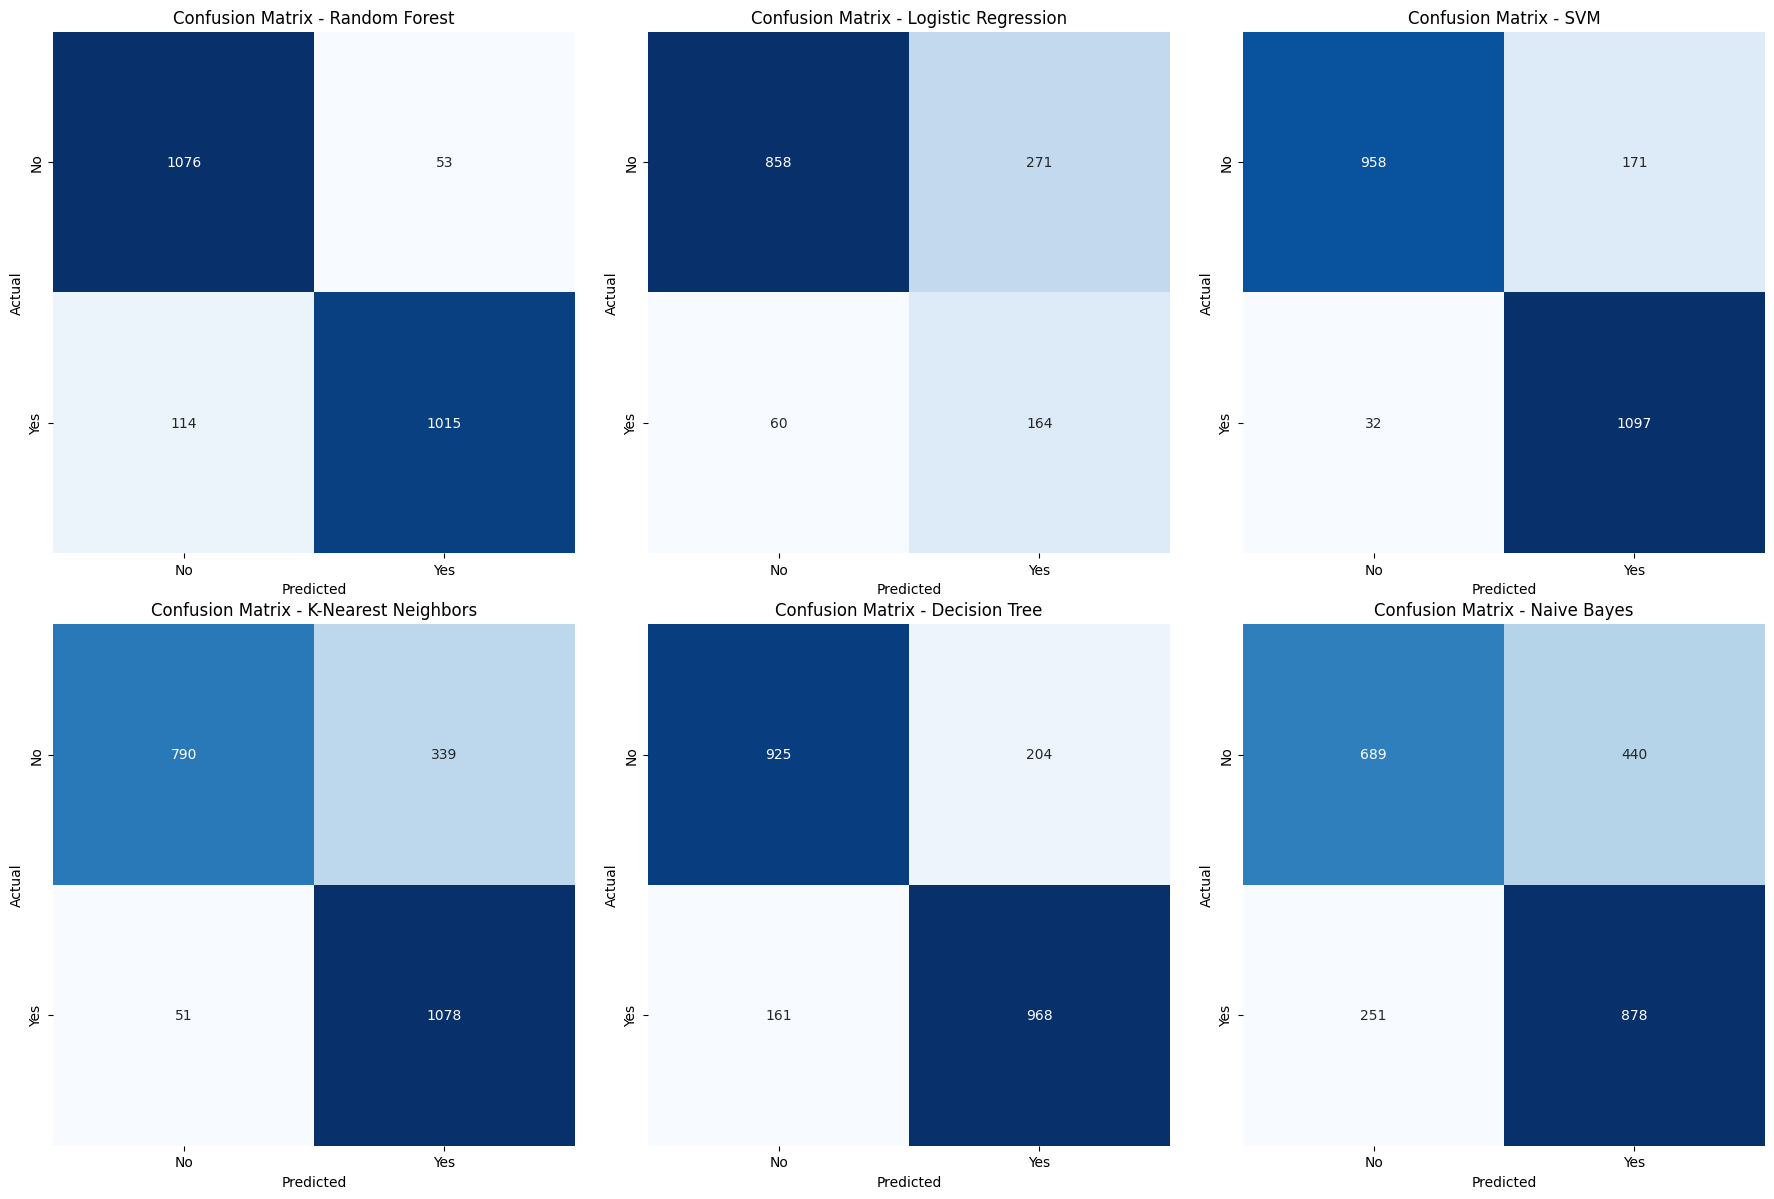

<ipython-input-135-cb70f234bdf0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


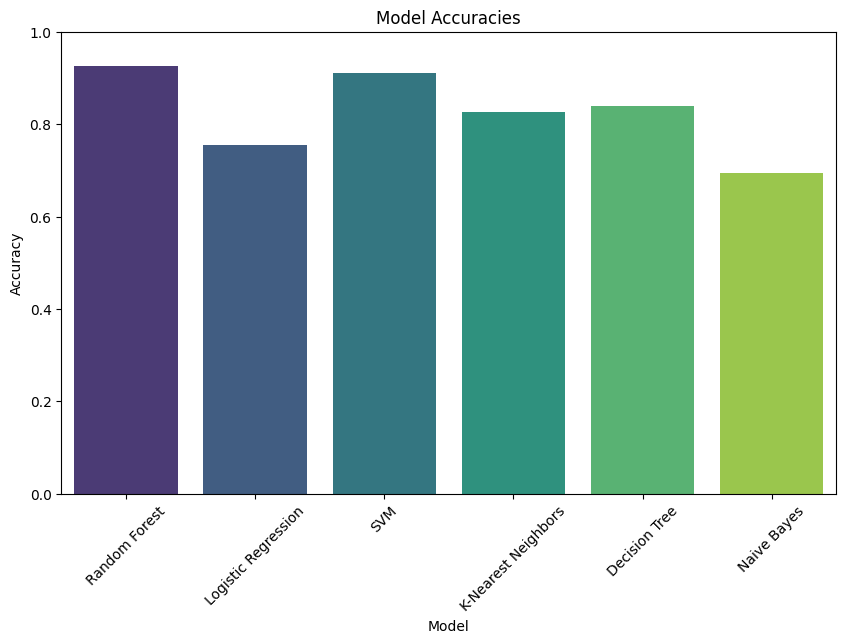

<ipython-input-135-cb70f234bdf0>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='muted')


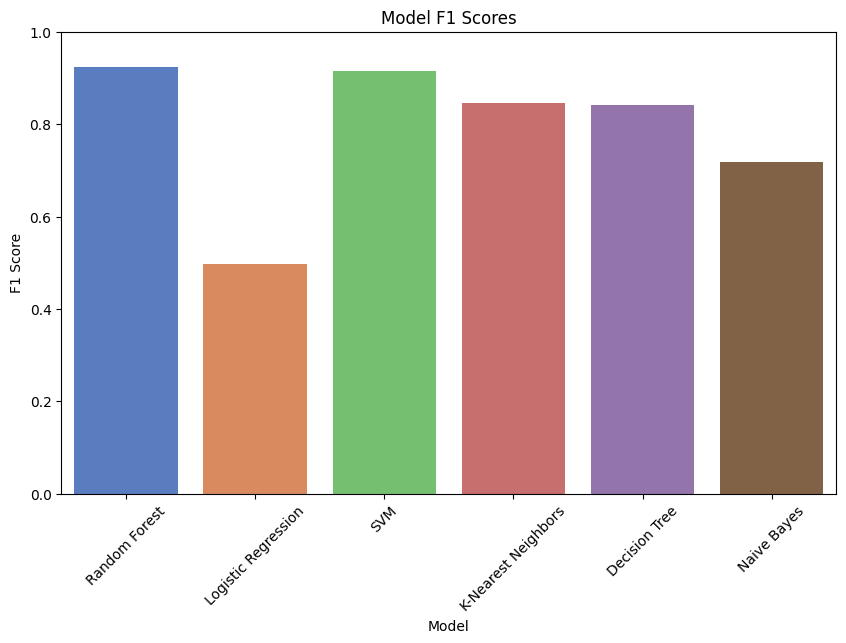

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of models, confusion matrices, accuracies, and F1 scores
models = ['Random Forest', 'Logistic Regression', 'SVM', 'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes']
conf_matrices = [conf_mat, conf_matReg, conf_matSvm, conf_mat_knn, conf_mat_dt, conf_mat_nb]
accuracies = [accuracy, accuracyReg, accuracySvm, accuracy_knn, accuracy_dt, accuracy_nb]
f1_scores = [f1_mat, f1_Reg, f1_svm, f1_knn, f1_dt, f1_nb]

# Plot confusion matrices
plt.figure(figsize=(18, 12))
for i, conf_mat in enumerate(conf_matrices):
    plt.subplot(2, 3, i+1)
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, square=True,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {models[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='muted')
plt.ylim(0, 1)
plt.title('Model F1 Scores')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

- **Random Forest** stands out as the best model, offering superior overall performance in both accuracy and F1 score for our dataset. This impressive result is achieved thanks to the combined use of SMOTE for balancing the dataset and K-fold cross-validation for robust model evaluation.
The F1 score chart highlights that Random Forest leads over other models, such as SVM, K-Nearest Neighbors, and Decision Tree. Likewise, the accuracy chart confirms its dominance. While Naive Bayes performs adequately, it does not match the high performance of Random Forest.